# Chapitre 4: Algebre lineaire - Les arrays:
L'algebre lineaire est l'une des blocs sur laquelle repose l'analyse numerique, les objets dans l'AL sont les vecteurs et les matrices. Le package NumPy englobe tout le necessaire pour creer et manipuler ses objets.
## Vue d'ensemble sur le type "array":
Un vecteur est cree en transformant une liste a un array tout simplement.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
v = np.array([1., 2., 3.])  # Un vecteur cree a partir d'une liste

- Operations algebriques de base:

In [9]:
# Creation de deux vecteurs:
v1 =  np.array([1., 2., 3.])
v2 =  np.array([4., 5., 6.])

# Multiplication/Division par un scalaire:
print(2*v1)
print(v1/2)

# Combinaisons lineaires
print(2*v1 + 3*v2)

# Norme d'un vecteur:
from scipy.linalg import norm
print("Norme de v1 = ", norm(v1))

# Produit scalaire:
print(np.dot(v1, v2))
# De facon equivalente:
print(v1 @ v2)

[2. 4. 6.]
[0.5 1.  1.5]
[14. 19. 24.]
Norme de v1 =  3.7416573867739413
32.0
32.0


- Remarque: On rappelle que toutes les operations elementaires sur deux arrays sont effectues par element:

In [10]:
print(v1*v2)
print(v1/v2)
print(v1+v2)
print(v1-v2)
print(v1%v2)

[ 4. 10. 18.]
[0.25 0.4  0.5 ]
[5. 7. 9.]
[-3. -3. -3.]
[1. 2. 3.]


- Remarque: Quelques fonctions agissent par element sur les arrays:

In [13]:
v1 = [0, np.pi/3, np.pi]
v2 = np.cos(v1)
print("v2 = {:}, type de v2: {:}".format(v2, type(v2)))

v2 = [ 1.   0.5 -1. ], type de v2: <class 'numpy.ndarray'>


On peut creer une matrice a partir d'une liste de listes:

In [15]:
M = np.array([[1., 2.],[3., 4.]]) # Une matrice 2*2
np.shape(M)

(2, 2)

## Indexation et slicing sur les "arrays":
- L'indexation des arrays utilise la meme notation de l'indexation des listes.

In [10]:
v = np.array([1., 2., 3.])
M = np.array([[1., 2.], [3., 4.]])

In [4]:
print(v[0])
print(v[1:]) # [2., 3.]

1.0
[2. 3.]


In [6]:
print(M[0, 1])
print(M[1, 1])

2.0
4.0


In [11]:
# Acces aux valeurs:
print(v)
v[0] = 10
print(v)

[1. 2. 3.]
[10.  2.  3.]


In [16]:
# Des slices:
print(v[:2]) # [10., 2.]
v[:2] = [0, 1]
print(v) # [0., 1., 3.]

[10.  2.]
[0. 1. 3.]


## Operations d'algebre lineaire:
### - L'operateur "dot"
- L'operateur le plus essentiel dans ce contexte est l'operateur "dot".

In [27]:
# Produit de matrice * vecteur = vecteur:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8 ,9]])
v = np.array([5, 7, 1])
print("Produit Matrice*vecteur : {:}".format(np.dot(M, v)))
# De facon  equivalente:
print("Autre facon\t\t: {:}".format(M @ v))

Produit Matrice*vecteur : [ 22  61 100]
Autre facon		: [ 22  61 100]


In [31]:
# Produit scalaire de vecteurs:
u = np.array([1, 2, 3])
v = np.array([5, 7, 1])

print("Produit scalaire : {:}".format(np.dot(u, v)))
# De facon  equivalente:
print("Autre facon\t : {:}".format(u @ v))

Produit scalaire : 22
Autre facon	 : 22


In [41]:
# Produit matriciel:

M1 = np.array([[1, 2, 3], [4, 5, 8], [7, 1, 6]])
M2 = np.array([[5, 7, 1], [1, 2, 3], [4, 1, 3]])

# Produit de deux matrices:
print("Produit de deux matrices:\n {:}".format(np.dot(M1, M2)))
# De facon  equivalente:
print("Autre facon:\t\t\n {:}".format(M1 @ M2))

Produit de deux matrices:
 [[19 14 16]
 [57 46 43]
 [60 57 28]]
Autre facon:		
 [[19 14 16]
 [57 46 43]
 [60 57 28]]


### - Resolution des systemes lineaires:
- Soit A une matrice donnee et b un vecteur, on peut resoudre l'equation $\:Ax = b$ en utilisant la methode "solve".

In [6]:
A = np.array([[1, 2], [3, 4]])
b = np.array([1, 4])

In [7]:
# Resolution du systeme:
x = np.linalg.solve(A, b)
print(x)

[ 2.  -0.5]


- La methode "allclose":
Elle est utilisee ici pour comparer deux vecteurs. Si ceux-ci sont tres proches l'un de l'autre, la commande retourne "True". Pour plus de details, consulter la section "algebre lineaire en $SciPy$"

In [11]:
print(np.allclose(np.dot(A, x), b))
print(np.allclose(A @ x, b))

True
True


- Remarques:
    - L'operation (*) entre deux matrices est effectuee par element, c-a-d, que, pour deux matrices A et B:
    \begin{equation}
    (A*B)_{ij} = A_{ij}*B_{ij}
    \end{equation}
    - Exemples:
    Normallement, si on prends deux matrices A et B tels que:
    \begin{equation}
    A = \begin{pmatrix}
    1 & 2\\ 
    3 & 4
    \end{pmatrix}
    \end{equation}
    
    \begin{equation}
    B = \begin{pmatrix}
    4 & 1\\ 
    8 & 4
    \end{pmatrix}
    \end{equation}
    Alors, le produit matricielle de A et B devra etre:   
    \begin{equation}
    A.B = \begin{pmatrix}
    20 & 9\\ 
    44 & 19
    \end{pmatrix}
    \end{equation}
    Cependant, ce qu'on obtient en effectuant cette operation sur Python est la matrice effectuant la multiplication par element:   

In [12]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[4, 1], [8, 4]])
print(A*B)

[[ 4  2]
 [24 16]]


Pour effectuer la bonne multiplication matricielle, il va falloir qu'on effectue l'operation "dot":

In [2]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[4, 1], 
              [8, 4]])
print(A @ B)

[[20  9]
 [44 19]]


### - L'operation "dot":
- Tous les operations vectorielles, matricielles et tensorielles s'effectuent en utilisant l'operation "dot". On doit tout de meme nous rappeler que l'operation "dot" n'a de sens que si le nombre de colonnes du premier soit egale au nombre de lignes du second !

In [14]:
# Matrice @ vecteur = vecteur 
M = np.array([[1, 2, 3], [4, 5, 6]]) #  2*3  --> C'est une Matrice: chaque array est une ligne.
v = np.array([0, 5, 1])              #  3*1  --> C'est un Vecteur: le seul array est une colonne (vecteur colonne).
print(np.dot(M, v)) # de facon equivalente: print(M @ v)  # vecteur (2*1), c'est un vecteur colonne.

# Vecteur @ vecteur = scalaire 
v1 = np.array([1, 2, 3]) #  2*3  --> C'est un vecteur v1: Le seul array est une colonne.
v2 = np.array([0, 5, 1]) #  2*3  --> C'est un vecteur v2: Le seul array est une colonne.
print(np.dot(v1, v2)) # de facon equivalente: print(v1 @ v2)  #  vecteur (1*1), c'est un scalaire

# Matrice @ Matrice = Matrice 
M1 = np.array([[1, 2, 3], [4, 5, 6]]) #  2*3  --> C'est une Matrice: chaque array est une ligne.
M2 = np.array([[0, 5], [1, 4], [4, 2]]) #  3*2  --> C'est une Matrice: chaque array est une ligne.
print(np.dot(M1, M2)) # de facon equivalente: print(M1 @ M2) # Matrice carre 2*2

# Vecteur @ matrice = vecteur 
M = np.array([[1, 2, 3], [4, 5, 6]])       # Matrice 2*3
v = np.array([1, 2])                       # Traitee comme Vecteur ligne dans ce cas.
print(np.dot(v, M)) # de facon equivalente: print(v @ M)  # Traitee comme Vecteur ligne dans ce cas mais peut etre
                    # utilisee comme vecteur colonne.

[13 31]
13
[[14 19]
 [29 52]]
[ 9 12 15]


- Remarque: Python permet l'utilisation d'un retour a la ligne pour une bonne visualisation des matrices: 

In [5]:
angle = np.pi/3
M = np.array([[np.cos(angle), -np.sin(angle)],
             [np.sin(angle),  np.cos(angle)]])
v = np.array([1, 0])
print(M @ v)

[0.5       0.8660254]


## Manipulation des arrays:
### - Proprietes:
- Les proprietes d'un type array est principalement contenue dans deux pricipaux attributs:
    - L'attribut "shape"  : Elle nous informe sur la facon selon laquelle les donnees stockes vont etre interpretes (comme vecteur, matrice, ou bien comme tenseur) et nous retourne la dimension du "array".
    - L'attribut "dtype"  : Cette methode nous retourne le type des donnees stockes.

In [13]:
M = np.array([[1, 2, 3], [4, 5, 6]])
print(M.shape)
print(M.dtype)

(2, 3)
int64
(24, 8)


- Remarques:
    - 1. On peut specifier explicitement le type des donnees stockes dans un array par l'attribut dtype.
    - 2. Quand on ne specifie pas le type des donnees, celui-ci est deviné !
    - 3. Attention aux conversions silencieuses de NumPy !!!
- Exemples:

In [30]:
# Exemple pour "1":
v = np.array([1, 2, 3], dtype = float)
print("v = {:} de type \"{:}\"\n".format(v, v.dtype))

# Exemple pour "2":
v1 = np.array([1, 2, 3])  # Type int 
v2 = np.array([1., 2, 3]) # Type float
print("v1 est de type \"{:}\" \nv2 est de type \"{:}\"\n".format(v1.dtype, v2.dtype))

# Exemple pour "3":
v1 = np.array([1, 2, 3])
print("v1 = {:} est de type \"{:}\" ".format(v1, v1.dtype))
v1[0] = 5 # Affectation d'un type int
print("v1 = {:} est de type \"{:}\" ".format(v1, v1.dtype))
v1[0] = 0.5 # Affectation d'un type float --> Il y'a une conversion automatique du int au float !!!! 
print("v1 = {:} est de type \"{:}\" ".format(v1, v1.dtype))

v = [1. 2. 3.] de type "float64"

v1 est de type "int64" 
v2 est de type "float64"

v1 = [1 2 3] est de type "int64" 
v1 = [5 2 3] est de type "int64" 
v1 = [0 2 3] est de type "int64" 


### Acces aux elements des arrays:
- L'acces aux elements d'un array s'effectue par ses indices. Par opposition aux listes, l'acces a un array contenant deux arrays par exemple (des matrices 2*2 par exemple) s'effectue avec une paire d'indices contenue dans une seule paire de crochets:

In [42]:
M = np.array([[3, 7, 8], 
              [74, 55, 10], 
              [71, 80, 95]])

# L'element 10 
print("M[1, 2] = {:}".format(M[1, 2])) # C'est aussi le dernier element de la ligne 1 ( = M[1, -1])

# L'element 95
print("M[2, 2] = {:}".format(M[2, 2])) # C'est aussi le dernier element de la ligne 2 ( = M[2, -1]) 
                                       # et de la matrice ( = M[-1, -1]) 

# L'element 3 
print("M[0, 0] = {:}".format(M[0, 0])) 

# L'element 80
print("M[2, 1] = {:}".format(M[2, 1])) # C'est aussi le second element de la derniere ligne ( = M[-1, 1]) 


M[1, 2] = 10
M[2, 2] = 95
M[0, 0] = 3
M[2, 1] = 80


### Slicing:
On peut creer des "slices" de donnees a partir de donnees stockes dans des arrays a une ou plusieurs dimensions.
- Exemples:

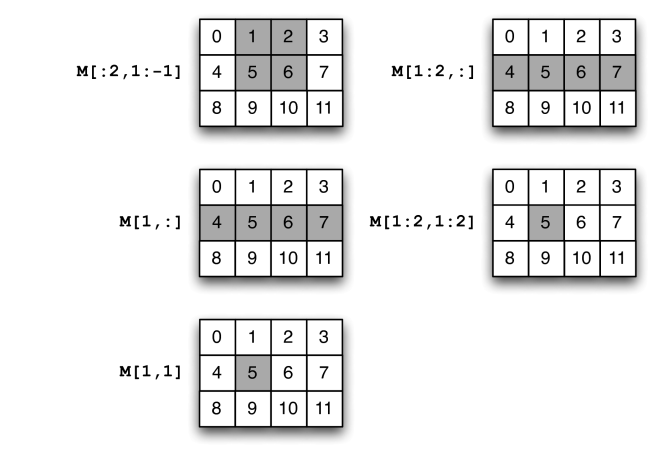

In [46]:
from IPython.display import Image
Image("/home/mouloud/Desktop/Doctorat/Modelisation/Cours_Complet_Jupyter/Figures/Fig13.png")

- Remarques: Dans l'exemple precedent: 
    - $":2" == "0:2", "1:-1" == "1:3"$
    - $"1" == "1:2", ":" == "0:-1"$
- Remarque: Quand on change les elements d'un slice, tout le "array" est changee:

In [3]:
v = np.array([1., 2., 3.])
v1 = v[:2]   # v1 est un array constituee des deux premiers elements de v.
print("v1 = {:}\nv = {:}".format(v1, v))
v1[0] = 50. # Cette modification sur v1 affecte v aussi !!!
print("v1 = {:}\nv = {:}".format(v1, v))

v1 = [1. 2.]
v = [1. 2. 3.]
v1 = [50.  2.]
v = [50.  2.  3.]


### Modification d'arrays en utilisant les slices:
On peut modifier les arrays en utilisant des slices ou par acces direct !
- Exemple:

In [13]:
M = np.array([[1, 2, 3.], 
             [4, 5, 6.], 
             [7, 8, 9.]])

# Affichage:
print("M = {:}\n".format(M))

# Modification d'un element !

M[1, 2] = 666 # Remplacer "6" par "666"
print("M = {:}\n".format(M))

# Modification d'une ligne (ligne d'indice 1 par exemple)

M[1,:] = np.array([0, 0, 0]) # Remplacer la ligne 1 par {0, 0, 0}
print("M = {:}\n".format(M))

# Modification d'une colonne (colonne d'indice 1 par exemple)

M[:,1] = np.array([0, 0, 0]) # Remplacer la colonne 1 par {0, 0, 0}
print("M = {:}\n".format(M))

# Etc....

M = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

M = [[  1.   2.   3.]
 [  4.   5. 666.]
 [  7.   8.   9.]]

M = [[1. 2. 3.]
 [0. 0. 0.]
 [7. 8. 9.]]

M = [[1. 0. 3.]
 [0. 0. 0.]
 [7. 0. 9.]]



- Exemple: On voudra remplacer dans la matrice qui suit, 
    - 1. Le bloc $\{\{7,8\}, \{11, 12\}\}$ par des zeros. 
    - 3. La diagonale par des zeros.

In [23]:
M = np.array([[1., 2., 3., 4.], 
              [5., 6., 7., 8.], 
              [9., 10., 11., 12.], 
              [13., 14., 15., 16.]])

M[1:3, 2:4] = np.array([[0, 0], [0, 0]]) # ILS DOIVENT AVOIR LA MEME STRUCTURE SOUHAITEE !
print("M = {:}\n".format(M))

M = np.array([[1., 2., 3., 4.], 
              [5., 6., 7., 8.], 
              [9., 10., 11., 12.], 
              [13., 14., 15., 16.]])

for j in range(0, 4, 1):
    M[j, j] = 0. # ILS DOIVENT AVOIR LA MEME STRUCTURE SOUHAITEE !
    
print("M = {:}".format(M))

M = [[ 1.  2.  3.  4.]
 [ 5.  6.  0.  0.]
 [ 9. 10.  0.  0.]
 [13. 14. 15. 16.]]

M = [[ 0.  2.  3.  4.]
 [ 5.  0.  7.  8.]
 [ 9. 10.  0. 12.]
 [13. 14. 15.  0.]]


### Fonctions constructrices d'arrays:
Dans le tableau suivant, on resume quelques methodes speciales largement utilisees pour creer des types specfiques d'arrays:

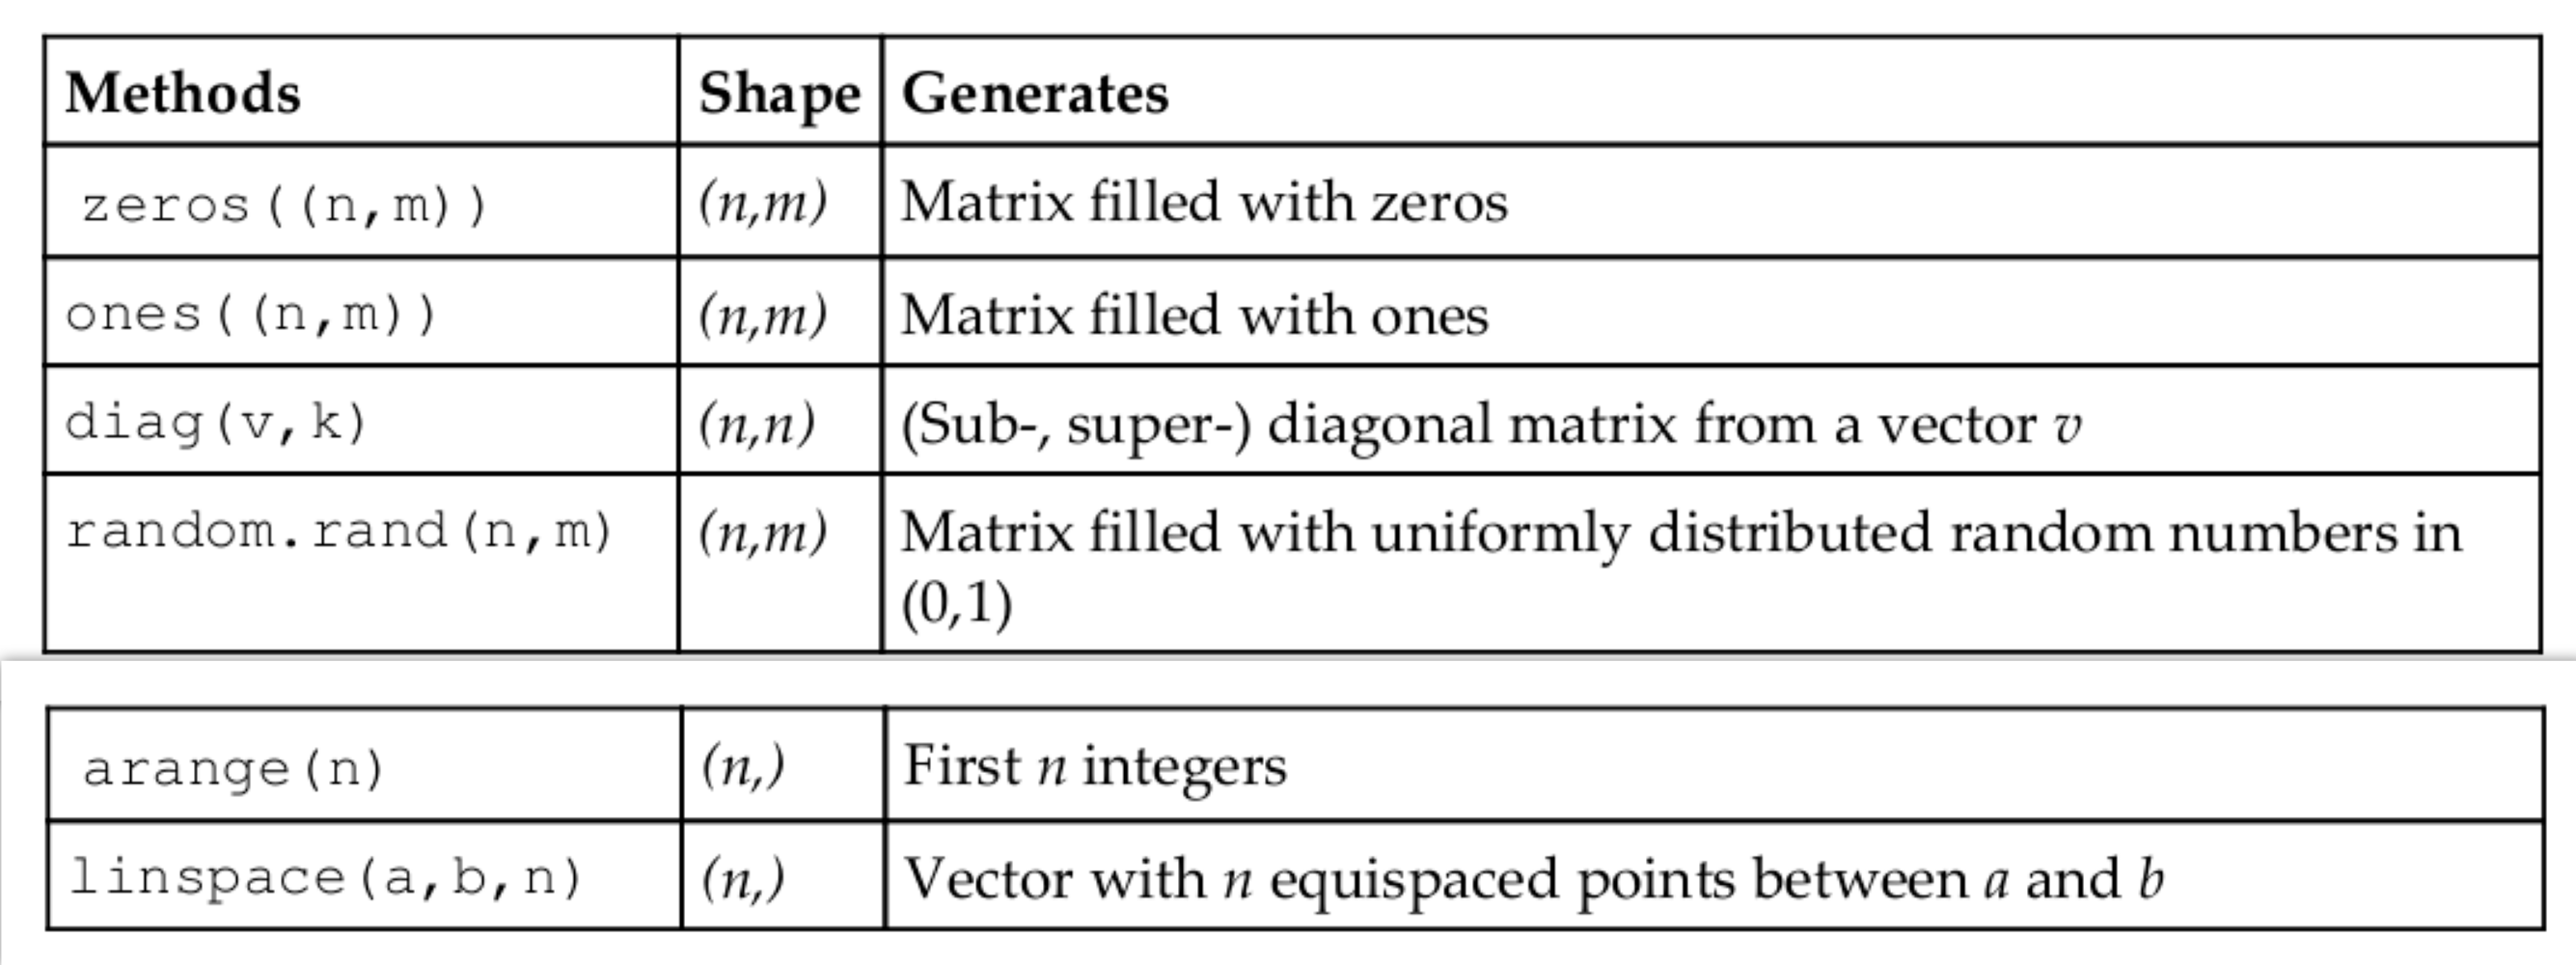

In [27]:
from IPython.display import Image
Image("/home/mouloud/Desktop/Doctorat/Modelisation/Cours_Complet_Jupyter/Figures/Fig14.png")

- Exemples:

In [43]:
M0 = np.zeros((3, 3)) # Matrice 3*3 remplis de zeros.
M1 = np.ones((2, 3))  # Matrice 2*3 remplis de uns.
v = np.array([1, 2, 3])

# Creer une matrice diagonale dans son rang 0 a partir de vecteur 3*1 --> Matrice 3*3
Md = np.diag(v, k = 0)
print("M0 = {:}\n\nM1 = {:}\n\nMd = {:}".format(M0, M1, Md))

# Creer une matrice diagonale dans son rang 1 a partir de vecteur 3*1 --> Matrice 4*4
v = np.array([1, 2, 3])
Md = np.diag(v, k = 1)
print("\nMd = {:}".format(Md))

# Creer une matrice diagonale dans son rang n a partir de vecteur m*1 --> Matrice (n+m)*(n+m)

# Creer une matrice diagonale dans son rang 3 a partir de vecteur 3*1 --> Matrice 6*6
v = np.array([1, 2, 3])

Md = np.diag(v, k = 3)
print("\nMd = {:}".format(Md))

# Creer une matrice aleatoire:
Mr = np.random.rand(3, 3)
print("\nMr = {:}".format(Mr))

# Creer un array avec un espacement qui peut etre flottant:
Mc = np.arange(0, 1.1, 0.1)
print("\nMc = {:}".format(Mc))

# Creer un array avec 100 noeuds entre 0 et 0.5 (h = 0.5/100 = 0.005)
Ml = np.linspace(0, 0.5, 100)
print("\nMl = {:}".format(Ml))



M0 = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

M1 = [[1. 1. 1.]
 [1. 1. 1.]]

Md = [[1 0 0]
 [0 2 0]
 [0 0 3]]

Md = [[0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]
 [0 0 0 0]]

Md = [[0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 3]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]

Mr = [[0.19065078 0.96499804 0.30495684]
 [0.74941273 0.96397785 0.25920103]
 [0.65694269 0.49727466 0.2176143 ]]

Mc = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

Ml = [0.         0.00505051 0.01010101 0.01515152 0.02020202 0.02525253
 0.03030303 0.03535354 0.04040404 0.04545455 0.05050505 0.05555556
 0.06060606 0.06565657 0.07070707 0.07575758 0.08080808 0.08585859
 0.09090909 0.0959596  0.1010101  0.10606061 0.11111111 0.11616162
 0.12121212 0.12626263 0.13131313 0.13636364 0.14141414 0.14646465
 0.15151515 0.15656566 0.16161616 0.16666667 0.17171717 0.17676768
 0.18181818 0.18686869 0.19191919 0.1969697  0.2020202  0.20707071
 0.21212121 0.21717172 0.22222222 0.22727273 0.23232323 0.23737374
 0.24242424 0.24747475 0.25252525 0.

- On note que les commandes qu'on a utilise dans ce qui precede sont des commandes qui peuvenet prendre des arguments. En particulier, les commandes zeros, ones, et arange peuvenet prendre 'dtype' comme argument, le type par defaut est 'float' a part pour arange.

- Une autre fonction speciale est la fonction "identity" qui construit une matrice identite d'une taille donnee !

In [3]:
Id = np.identity(3)
print(Id)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Acces et changement de la forme d'une matrice.
- Le nombre de dimensions est ce qui differencie un vecteur d'une matrice. La "forme" (the 'shape') est ce qui differencie deux vecteurs de tailles differentes. Dans cette section, on discutera comment obtenir et changer la forme d'un 'array'.

#### La fonction 'shape':
- La forme d'une matrice est un tuple de ses dimensions. La forme d'une matrice (n x m) est le tuple (n,m)
- Pour un vecteur, la forme est un singleton qui contient la longueur du vecteur.
- Exemples:

In [9]:
M = np.identity(3)
M.shape # Equivalente a np.shape(M)

(3, 3)

In [10]:
v = np.array([1., 2., 3., 4.])
np.shape(v)

(4,)

- Remarque: L'avantage de l'utilisation de la fonction 'shape( )' au lieu de l'attribut '.shape' est que le premier admet les listes et les scalaires comme entrees ! 

### Nombre de dimensions et Retaillage.

Le nombre de dimensions d'un array est obtenu de la facon suivante: 

In [6]:
A = np.array([[1., 2., 3.], 
             [4., 5., 6.], 
             [6., 7., 8.]])
print(np.ndim(A)) # Equivalente a print(A.ndim)

2


- Remarque: On note que le nombre de dimensions retournee par 'ndim' d'un tenseur 'A' (vecteur, matrice ou tenseur d'ordre superieur) est toujours egal a la longueur de sa forme. 
- Exemples:

In [12]:
T = np.zeros(3) # Vecteur
print("T = {:}".format(T))
print("# of dimensions = {:}".format(T.ndim))

T = np.zeros((3, 2)) # Matrice
print("T = {:}".format(T))
print("# of dimensions = {:}".format(T.ndim))

T = np.zeros((3, 2, 2)) # Tensur de dimension 3
print("T = {:}".format(T))
print("# of dimensions = {:}".format(T.ndim))

T = [0. 0. 0.]
# of dimensions = 1
T = [[0. 0.]
 [0. 0.]
 [0. 0.]]
# of dimensions = 2
T = [[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
# of dimensions = 3


- La methode "reshape" donne un "new look" pour un array SANS COPIER les donnees! La seul condition c'est que le nombre de donnees du array est le nombre d'entrees possibles de l'array reformee doivent etre egaux.
- Exemples:

In [29]:
v = np.array([0.,1., 2., 3., 4., 5.])
M = v.reshape(3, 2)
print(M)

v = np.array([[0.,1., 2.], [3., 4., 5.]])
M = v.reshape(1, 6)
print(M)

[[0. 1.]
 [2. 3.]
 [4. 5.]]
[[0. 1. 2. 3. 4. 5.]]


- Remarque: La methode reshape NE CREE PAS un nouveau array, mais elle donne une nouvelle vue de l'array qui existe deja. Ce qui fait que, en changeant un element de M par exemple dans l'exemple precedent va automatiquement changer ce meme element dans l'array v. Quand ce comportement n'est pas acceptable ou souhaitable, on est dans l'obligation de copier les donnees dans un autre array avec la methode "copy".
- Exemple:

In [52]:
v = np.array([0.,1., 2., 3., 4., 5.])
M = v.reshape(3, 2)
print("v = {:}\n\nM = {:}".format(v, M))

M[1, 0] = 100. # Changer 2 par 100 dans M
print("\nv = {:}\n\nM = {:}".format(v, M)) # Le changement affecte les deux arrays !!!!!!


v = [0. 1. 2. 3. 4. 5.]

M = [[0. 1.]
 [2. 3.]
 [4. 5.]]

v = [  0.   1. 100.   3.   4.   5.]

M = [[  0.   1.]
 [100.   3.]
 [  4.   5.]]


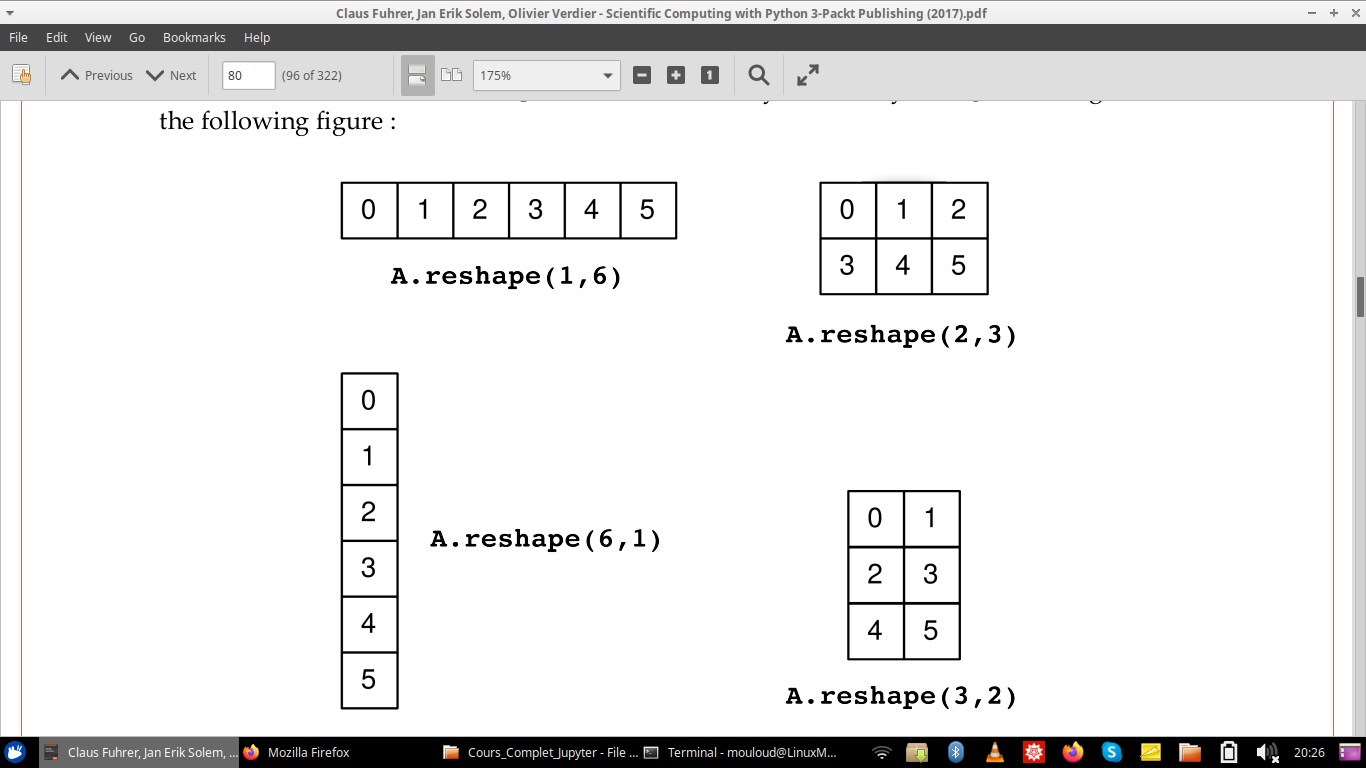

In [37]:
from IPython.display import Image
Image("/home/mouloud/Desktop/Doctorat/Modelisation/Cours_Complet_Jupyter/Figures/Fig15.png")

Parfois, il est preferable de specifier seulement une des dimensions de l'array et laisser Python determiner l'autre, ceci est effectuee en utilisant '-1' dans la dimension qui reste !
- Exemple

In [51]:
v = np.array([0.,1., 2., 3., 4., 5., 6., 7.])
M = v.reshape(2, -1) # 2 lignes et X colonnes, X est specifiee par Python
print("\nv = {:}\n\nM = {:}".format(v, M))
M = v.reshape(2, 2, -1) # Tenseur 2*2*X, ou X est a specifier par Python.
print("\nv = {:}\n\nM = {:}".format(v, M))


v = [0. 1. 2. 3. 4. 5. 6. 7.]

M = [[0. 1. 2. 3.]
 [4. 5. 6. 7.]]

v = [0. 1. 2. 3. 4. 5. 6. 7.]

M = [[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


### Transposition:
Une forme speciale de "reshape" est la transposition ! La transposee d'une matrice A est une matrice B tel que:
\begin{equation}
A_{ij} = B_{ji}
\end{equation}
En Python, c'est la methode 'T' qui nous fait l'affaire:

In [67]:
A = np.array([0., 1., 2., 3., 4.])
print("A = ", A)
print("Forme de A: ", np.shape(A))
B = A.T
print("\nB = ", B)
print("Forme de B: ", np.shape(B))

A = np.array([[0., 1., 2., 3., 4.], [5., 6., 7., 8., 9.]])
print("\n\nA = ", A)
print("Forme de A: ", np.shape(A))
B = A.T
print("\nB = ", B)
print("Forme de B: ", np.shape(B))

A =  [0. 1. 2. 3. 4.]
Forme de A:  (5,)

B =  [0. 1. 2. 3. 4.]
Forme de B:  (5,)


A =  [[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
Forme de A:  (2, 5)

B =  [[0. 5.]
 [1. 6.]
 [2. 7.]
 [3. 8.]
 [4. 9.]]
Forme de B:  (5, 2)


- Remarque: 
    - Tant qu'elle est une forme speciale de "reshape", la methode Transpose n'effectue pas de copie, donc si on change un element de la transposee, ca affecte egalement le "array" de base.
    - Ce que nous avons en tete lorsqu'on effectue une transposition d'un vecteur, c'est de recuperer un vecteur colonne de la meme taille que le premier si celui-ci est ligne, ceci est effectuee par 'reshape(-1, 1)', ou un vecteur ligne de la meme taille que le premier si celui-ci est colonne , ceci est effectuee par 'reshape(-1, 1)'.

In [82]:
v1 = np.array([0., 1., 2., 3., 4., 5.])
print("v1 = ",v1)
print("shape de v1 = ",v1.shape)

v2 = v1.reshape(1, -1)
print("\nv2 = ",v2)
print("shape de v2 = ",v2.shape)

v1 =  [0. 1. 2. 3. 4. 5.]
shape de v1 =  (6,)

v2 =  [[0. 1. 2. 3. 4. 5.]]
shape de v2 =  (1, 6)


### Empilage
La methode la plus utilisee pour construire des matrices a partir d'un ensemble de sous matrices est la fonction: 'concatenate'
- Exemple:

In [21]:
v1 = np.array([1., 2., 3.])
v2 = np.array([4., 5., 6.])
v3 = np.array([7., 8., 9.])

M = np.concatenate((v1, v2, v3), axis = 0)
print(M)

v1 = np.array([[1., 2.], 
               [3., 4.]])

v2 = np.array([[5., 6.], 
               [7., 8.]])

v3 = np.array([[9., 10.], 
               [11., 12.]])

M0 = np.concatenate((v1, v2, v3), axis = 0) # Concatenation vertical --> l'un au dessus de l'autre dans l'ordre 
                                            # specifie !

M1 = np.concatenate((v1, v2, v3), axis = 1) # Concatenation horizontal --> l'un au dessus de l'autre dans l'ordre 
                                            # specifie !

print("M0 = {:}\n\nM1 = {:}".format(M0, M1))

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
M0 = [[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]
 [11. 12.]]

M1 = [[ 1.  2.  5.  6.  9. 10.]
 [ 3.  4.  7.  8. 11. 12.]]


- La concatenation peut etre faite avec plusieurs autres fonctions plus convenables, en particulier:
    - hstack       --> Concatenation horizontale des matrices.
    - vstack       --> Concatenation verticale des matrices.
    - column_stack  --> Concatenation des matrices par colonnes.
- Exemples:

In [28]:
v1 = np.array([1., 2.])
v2 = np.array([3., 4.])

M1 = np.vstack([v1, v2]) # Retourne: [ [1, 2]
                                 #  [3, 4] ]
    
M2 = np.hstack([v1, v2]) # Retourne [1, 2, 3, 4]

M3 = np.column_stack([v1, v2]) # Retourne [ [1, 3]
                                         #  [2, 4] ]
    
print("M1 = {:}\n\nM2 = {:}\n\nM3 = {:}".format(M1, M2, M3))

M1 = [[1. 2.]
 [3. 4.]]

M2 = [1. 2. 3. 4.]

M3 = [[1. 3.]
 [2. 4.]]


- Exemple: la permutation symplectique:
    - Soit un vecteur de taille 2n (Taille paire), une transformation symplectique d'un vecteur consiste a echanger les premiers 'n' elements du vecteur avec les 'n' derniers elements avec changement de signe. 

\begin{equation}
(x_1, x_2, ...., x_n, x_{n+1}, ...., x_{2n}) \mapsto (x_{n+1}, ...., x_{2n}, -x_1, -x_2, ...., -x_n)
\end{equation}

- L'operation de permutation symplectique est effectuee sous Python de la facon suivante:

In [30]:
# v est suppose dans cet exemple avoir une taille paire.
def symp(v):
    n = len(v) // 2 # Division entiere
    return np.hstack([v[-n:], -v[:n]])

v1 = np.array([1., 2., 3., 4.])
vs = symp(v1)
print("v1 = {:}\n\nvs = {:}".format(v1, vs))

v1 = [1. 2. 3. 4.]

vs = [ 3.  4. -1. -2.]


## Fonctions agissant sur des "arrays":

Il existe deux types de fonctions agissant sur des 'arrays', certains agissent par element, et retournent un "array" de la meme taille du premier 'array', ceux-ci sont dites des fonctions universelles. D'autres retournent un array de taille differente. 

### Fonctions universelles

#### Fonctions universelles predefinies

Des exemples typiques de telles fonctions sont celles qui sont deja definis sur Numpy, en plus des operateurs simples tels que la multiplication ou la puissance.
- Exemples:

In [38]:
v1 = np.array([1., 2.])
v2 = np.array([1., 4.])

print("v1 =", v1)
print("v2 =", v2)

print("\n2*v1 =", 2*v1)
print("\nv1*v2 =", v1*v2)
print("\nv1**2 =", v1**2)
print("\n2**v1 =", 2**v1)
print("\nv2**v1 =", v2**v1)
print("\ncos(v1) =", np.cos(v1))


v1 = [1. 2.]
v2 = [1. 4.]

2*v1 = [2. 4.]

v1*v2 = [1. 8.]

v1**2 = [1. 4.]

2**v1 = [2. 4.]

v2**v1 = [ 1. 16.]

cos(v1) = [ 0.54030231 -0.41614684]


#### Creation de fonctions universelles:

Quand une fonction qu'on defini ne contient que des fonctions universelles, celle-ci est automatiquement universelle. Par contre, si une fonction utilise un melange de fonctions universelles et non-universelles, on pourra avoir des scalaires, ou meme des erreurs quand on voudra les appliquer sur des arrays.

- Exemples:

In [12]:
def const(x):
    return 1
v = np.array([0., 2., 3.])
v1 = const(v) # retourne 1
print("v = {:}, v1 = {:}".format(v, v1))  ## Retourne Erreur

v = [0. 2. 3.], v1 = 1


In [22]:
def heaviside(x):
    if x >= 0:
        return 1.
    else: 
        return 0.

v = np.array([0., 2., 3.])
v1 = heaviside(v) # retourne 1
print("v = {:}, v1 = {:}".format(v, v1))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Le comportement attendu de la fonction 'heaviside' appliquée sur un vecteur [a, b] est de retourner un vecteur [heaviside(a), heaviside(b)]. La fonction heaviside qu'on a defini avant retourne toujours un scalaire quelque soit la taille de l'argument en entrée. La fonction "vectorize" de 'NumPy' permet de remedier rapidement a ce probleme: 

In [16]:
vheaviside = np.vectorize(heaviside)

v = np.array([-1., -0.5, 2., 3.])
v1 = vheaviside(v) # retourne 1
print("v = {:}, v1 = {:}".format(v, v1))

v = [-1.  -0.5  2.   3. ], v1 = [0. 0. 1. 1.]


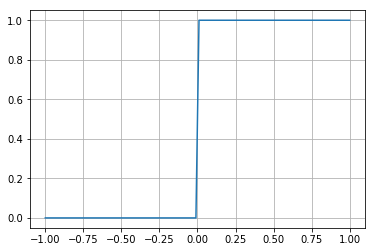

In [21]:
# Tracer la fonction de heaviside:
def heaviside(x):
    if x >= 0:
        return 1.
    else: 
        return 0.

x = np.linspace(-1, 1, 100)
vheaviside = np.vectorize(heaviside)
plt.plot(x, vheaviside(x))
plt.grid(True)
plt.show()

- Remarque: La fonction vectorize n'ameliore pas la performance d'une fonction mais elle nous propose une maniere plus convenable pour transformer rapidement une fonction pour que cette derniere agit par element sur les listes et les arrays.

### Fonctions non-universelles
Il existe beaucoup de fonctions non-universelles importantes qui peuvent agir sur des arrays, on cite par exemple, les fonctions 'sum', 'max', 'min' etc... Ces fonctions agissent sur toute la matrice par colonne ou par ligne, ou sur toute la matrice si aucun argument supplementaire n'est fourni.

In [3]:
A = np.array([ [1., 2., 3.], 
               [4., 5., 6.], 
               [7., 8., 9.] ])

somme = np.sum(A) # Effectuer une somme des elements de la matrice A.
Max = np.max(A)   # Trouver le maximum des elements de la matrice A.
Min = np.min(A)   # Trouver le minimum des elements de la matrice A.
print("Somme = {:}, Max = {:}, Min = {:}".format(somme, Max, Min))

somme = np.sum(A, axis = 0) # Effectuer une somme des elements de la matrice A en specifiant l'axe selon lequel on somme.
                            # Retourne [12, 15, 18]
    
Max = np.max(A, axis = 0)   # Trouver le maximum des elements de la matrice A en specifiant l'axe selon lequel on calcul
                            # le max. Retourne [7, 8, 9]
    
Min = np.min(A, axis = 0)   # Trouver le minimum des elements de la matrice A en specifiant l'axe selon lequel on calcul
                            # le min. Retourne [1, 2, 3]

print("\nSomme = {:}, Max = {:}, Min = {:}".format(somme, Max, Min))

somme = np.sum(A, axis = 1) # Effectuer une somme des elements de la matrice A en specifiant l'axe selon lequel on somme.
                            # Retourne [6, 15, 24]
    
Max = np.max(A, axis = 1)   # Trouver le maximum des elements de la matrice A en specifiant l'axe selon lequel on calcul
                            # le max. Retourne [3, 6, 9]
    
Min = np.min(A, axis = 1)   # Trouver le minimum des elements de la matrice A en specifiant l'axe selon lequel on calcul
                            # le min. Retourne [1, 4, 7]

print("\nSomme = {:}, Max = {:}, Min = {:}".format(somme, Max, Min))

Somme = 45.0, Max = 9.0, Min = 1.0

Somme = [12. 15. 18.], Max = [7. 8. 9.], Min = [1. 2. 3.]

Somme = [ 6. 15. 24.], Max = [3. 6. 9.], Min = [1. 4. 7.]


## Methodes d'algebre lineaires avec SciPy
Le module 'scipy.linalg' contient quelques methodes algebriques largement utilisees en Algebre lineaire. Pour plus sur ces methodes, voir le lien suivant:
http://people.duke.edu/~ccc14/sta-663-2016/07_LinearAlgebra2.html

http://people.duke.edu/~ccc14/sta-663-2016/08_LinearAlgebraExamples.html